In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver

## Solving TSP with metaheuristic algorithms

In this notebook, we are going to demostrate using metaheuristic to solve TSP. Including
- Simulated Annealing

### 0. Preparation
In this section, we will randomly generate TSP instances

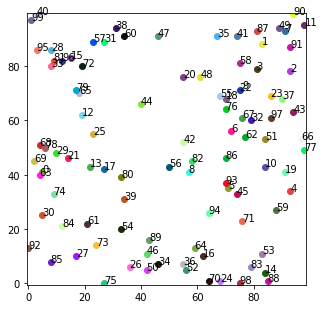

In [2]:
# Generate and plot instance
nodes = vrpSolver.rndPlainNodes(N = 100)
fig, ax = vrpSolver.plotNodes(
    nodes = nodes)
fig

### 1. Simulated Annealing

In [3]:
metaTSP = vrpSolver.metaTSP(
    nodes = nodes,
    metaAlgo = 'SimulatedAnnealing',
    metaAlgoArgs = {
        'initAlgo': 'NearestNeighbor',
        'initTemp': 100,
        'iterTemp': 200,
        'coolRate': 0.9995,
        'stopCriteria': [('Final_Temperature', 0.001)]
    })

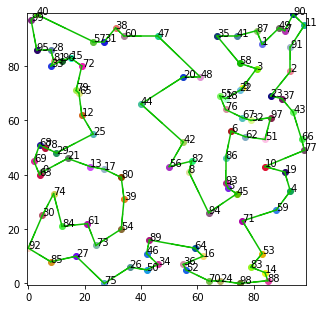

In [4]:
fig, ax = vrpSolver.plotNodes(nodes = nodes)
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    seq = metaTSP['seq'])
fig

In [5]:
metaTSP['ofv']

786.2398991153242

In [6]:
metaTSP['metaStat']

{'endCriteria': 'Final_Temperature',
 'temperature': 0.000999047209554971,
 'iterTotal': 4604400,
 'iterNoImp': 826397,
 'acceptRate': 0.11674832768656068,
 'runtime': 59.908581}

Next, we compare the result with simple heuristic solution

In [7]:
heuTSP = vrpSolver.heuTSP(
    nodes = nodes,
    consAlgo = 'Sweep',
    impAlgo = '2Opt')

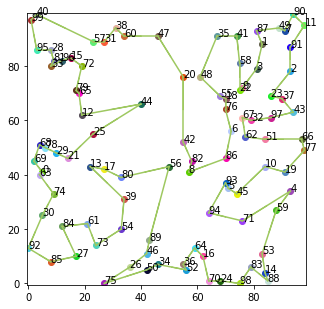

In [8]:
fig, ax = vrpSolver.plotNodes(nodes = nodes)
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    seq = heuTSP['seq'])
fig

In [9]:
heuTSP['ofv']

863.0435565928898

Finally, we compare the result with optimal solution

In [10]:
ipTSP = vrpSolver.ipTSP(
    nodes = nodes)

Academic license - for non-commercial use only


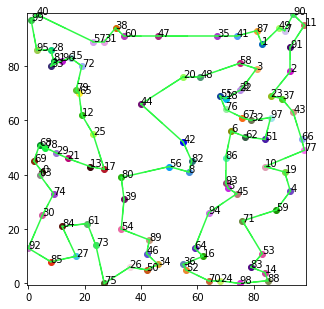

In [11]:
fig, ax = vrpSolver.plotNodes(nodes = nodes)
fig, ax = vrpSolver.plotSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    seq = ipTSP['seq'])
fig

In [12]:
ipTSP['ofv']

777.366618508626

In summary:

In [13]:
print("Optimal sol.: %s, runtime: %s[s]" % (
    round(ipTSP['ofv'], 2), 
    round(ipTSP['runtime'], 2)))
print("Heuristic sol.: %s, gap: %s%%" % (
    round(heuTSP['ofv'], 2),
    round((heuTSP['ofv'] - ipTSP['ofv']) / ipTSP['ofv'] * 100, 2)))
print("Metaheuristic sol.: %s, gap: %s%%" % (
    round(metaTSP['ofv'], 2),
    round((metaTSP['ofv'] - ipTSP['ofv']) / ipTSP['ofv'] * 100, 2)))

Optimal sol.: 777.37, runtime: 10.16[s]
Heuristic sol.: 863.04, gap: 11.02%
Metaheuristic sol.: 786.24, gap: 1.14%
